# Predictions, part I
- drop columns: no
- normalization: no
- hyperparameter tuning: no
- one-hot encoding: yes, the dataset was found encoded
- oversampling: no

In this session, I tested every model's performance on unscaled dataset.\
RandomForestClassifier seems like the best performer, as a standalone model, and as a base estimator to 2 ensemble methods.\
These are the best accuracy scores in %:
- KNeighborsClassifier = 77.2
- LogisticRegression = 79.94
- DecisionTreeClassifier = 82.35
- BaggingClassifier(RandomForestClassifier) = 86.18
- **RandomForestClassifier = 86.31**
- GradientBoostingClassifier = 81.49
- AdaBoostClassifier(RandomForestClassifier) = 86.01

In the next session, I will scale the data and repeat these tests, to compare the scores.

# train_test_split

In [1]:
%run "common_imports.py"

df = pd.read_csv("../data/02.csv")
features = df.drop(columns=["is_canceled"])
target = df["is_canceled"]

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

display(X_train.head(), "")
display(y_train.head(), "")

,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
104182,23,2,11,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
110320,102,17,24,4,1,3,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
60388,489,46,10,11,0,2,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
105591,36,7,12,2,2,1,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
73207,101,33,17,8,1,3,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0


''

104182    0
110320    0
60388     1
105591    0
73207     1
Name: is_canceled, dtype: int64

''

In [40]:
X_test

,lead_time,arrival_date_week_number,arrival_date_day_of_month,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,...,reserved_room_type_G,reserved_room_type_H,reserved_room_type_L,deposit_type_No_Deposit,deposit_type_Non_Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
24934,21,23,4,6,2,4,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
32019,4,2,14,1,0,1,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
77302,19,41,6,10,0,3,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
104219,4,2,10,1,0,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
70973,138,26,27,6,0,3,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25778,16,28,8,7,1,2,2,1,0,0,...,0,0,0,1,0,0,0,0,1,0
34865,58,14,7,4,0,1,2,0,0,0,...,0,0,0,1,0,0,0,0,1,0
70135,173,24,11,6,2,3,2,0,0,0,...,0,0,0,0,1,0,0,0,1,0
91891,4,27,26,6,2,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


## Models

In [53]:
# KNeighborsClassifier = 77.2

knn = KNeighborsClassifier()
display(knn.fit(X_train, y_train), "")

accuracy = knn.score(X_test, y_test) * 100
print(f"KNN accuracy is {accuracy:.2f}% \n")

pred = knn.predict(X_test)
print(classification_report(y_pred = pred, y_true = y_test), "\n")

KNeighborsClassifier()

''

KNN accuracy is 77.20% 

              precision    recall  f1-score   support

           0       0.79      0.86      0.83     14940
           1       0.72      0.63      0.67      8902

    accuracy                           0.77     23842
   macro avg       0.76      0.74      0.75     23842
weighted avg       0.77      0.77      0.77     23842
 



In [52]:
"""
LogisticRegression = 79.94

- top 5 features by absolute coefficient
  - deposit_type_No_Deposit 1.97
  - deposit_type_Non_Refund 1.69
  - previous_cancellations 1.27
  - required_car_parking_spaces 0.98
  - market_segment_Offline_TA_TO 0.78
"""

lr = LogisticRegression()
display(lr.fit(X_train, y_train), "")

accuracy = lr.score(X_test, y_test) * 100
print(f"Logistic Regression score is {accuracy:.2f}% \n")

pred = lr.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

# individual coefficients
coefficients = lr.coef_[0]
feature_names = X_train.columns
coefficients_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coefficients_df["Absolute Coefficient"] = abs(coefficients_df["Coefficient"])
coefficients_df[["Coefficient", "Absolute Coefficient"]] = coefficients_df[["Coefficient", "Absolute Coefficient"]].round(2)
coefficients_df = coefficients_df.sort_values(by="Absolute Coefficient", ascending=False)
display(coefficients_df)

/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

''

Logistic Regression score is 79.94% 

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     14940
           1       0.83      0.58      0.68      8902

    accuracy                           0.80     23842
   macro avg       0.81      0.76      0.77     23842
weighted avg       0.80      0.80      0.79     23842
 



,Feature,Coefficient,Absolute Coefficient
43,deposit_type_No_Deposit,-1.97,1.97
44,deposit_type_Non_Refund,1.69,1.69
10,previous_cancellations,1.27,1.27
12,required_car_parking_spaces,-0.98,0.98
28,market_segment_Offline_TA_TO,-0.78,0.78
49,customer_type_Transient-Party,-0.73,0.73
13,total_of_special_requests,-0.73,0.73
48,customer_type_Transient,0.58,0.58
27,market_segment_Groups,0.55,0.55
29,market_segment_Online_TA,0.45,0.45


DecisionTreeClassifier()

''

Decision Tree accuracy is 82.35% 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     14940
           1       0.76      0.76      0.76      8902

    accuracy                           0.82     23842
   macro avg       0.81      0.81      0.81     23842
weighted avg       0.82      0.82      0.82     23842
 



{'deposit_type_Non_Refund': '0.24',
 'lead_time': '0.16',
 'avg_daily_rate': '0.12',
 'arrival_date_day_of_month': '0.08',
 'arrival_date_week_number': '0.06',
 'total_of_special_requests': '0.06',
 'stays_in_week_nights': '0.04',
 'market_segment_Online_TA': '0.04',
 'stays_in_weekend_nights': '0.03',
 'previous_cancellations': '0.03',
 'required_car_parking_spaces': '0.02',
 'arrival_date_month': '0.01',
 'adults': '0.01',
 'children': '0.01',
 'previous_bookings_not_canceled': '0.01',
 'hotel_Resort': '0.01',
 'meal_BB': '0.01',
 'reserved_room_type_A': '0.01',
 'reserved_room_type_D': '0.01',
 'customer_type_Transient': '0.01',
 'babies': '0.00',
 'is_repeated_guest': '0.00',
 'booked_by_company': '0.00',
 'booked_by_agent': '0.00',
 'hotel_City': '0.00',
 'meal_FB': '0.00',
 'meal_HB': '0.00',
 'meal_No_meal': '0.00',
 'market_segment_Aviation': '0.00',
 'market_segment_Complementary': '0.00',
 'market_segment_Corporate': '0.00',
 'market_segment_Direct': '0.00',
 'market_segment_

''

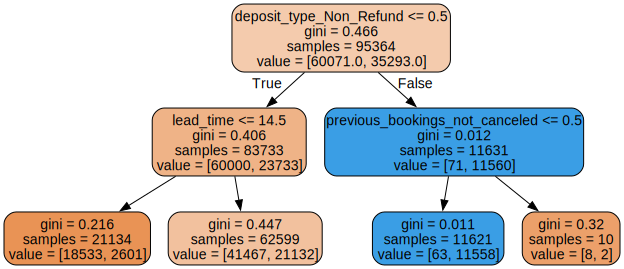

In [51]:
"""
DecisionTreeClassifier = score 82.35

- tree importance:
  - 'deposit_type_Non_Refund': '0.24',
  - 'lead_time': '0.16',
  - 'avg_daily_rate': '0.12',
  - 'arrival_date_day_of_month': '0.08',
  - 'arrival_date_week_number': '0.06',
  - 'total_of_special_requests': '0.06',
  - 'stays_in_week_nights': '0.04',
  - 'market_segment_Online_TA': '0.04',
  - 'stays_in_weekend_nights': '0.03',
  - 'previous_cancellations': '0.03',
  - 'required_car_parking_spaces': '0.02',
  - 'arrival_date_month': '0.01',
  - 'adults': '0.01',
  - 'children': '0.01',
  - 'previous_bookings_not_canceled': '0.01',
  - 'hotel_Resort': '0.01',
  - 'meal_BB': '0.01',
  - 'reserved_room_type_A': '0.01',
  - 'reserved_room_type_D': '0.01',
  - 'customer_type_Transient': '0.01'
"""

dt = DecisionTreeClassifier()
display(dt.fit(X_train, y_train), "")

accuracy = dt.score(X_test, y_test) * 100
print(f"Decision Tree accuracy is {accuracy:.2f}% \n")

pred = dt.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

tree_importance = {feature: f"{importance:.2f}" for feature, importance in zip(X_train.columns, dt.feature_importances_)}
sorted_tree_importance = {k: v for k, v in sorted(tree_importance.items(), key=lambda item: item[1], reverse=True)}
display(sorted_tree_importance, "")

dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)

dot_data = export_graphviz(dt, out_file="tree.dot", filled=True, rounded=True, feature_names=X_train.columns)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

## Ensemble methods

I have used the following 4 ensemble methods (with base estimators where possible) = and these are the best accuracy scores:
1. BaggingClassifier(RandomForestClassifier) = 86.18
2. **RandomForestClassifier = 86.31**
3. GradientBoostingClassifier = 81.49
4. AdaBoostClassifier(RandomForestClassifier) = 86.01

### BaggingClassifier

- #1 BaggingClassifier = 85.27
- #2 BaggingClassifier(KNeighborsClassifier) = 77.58
- #3 BaggingClassifier(LogisticRegression) = 79.94
- #4 BaggingClassifier(DecisionTreeClassifier) = 85.09
- #5 **BaggingClassifier(RandomForestClassifier) = 86.18**
- #6 BaggingClassifier(GradientBoostingClassifier) = 81.59

In [54]:
#1 BaggingClassifier = 85.27

bagging = BaggingClassifier()
display(bagging.fit(X_train, y_train), "")

accuracy = bagging.score(X_test, y_test) * 100
print(f"Bagging accuracy is {accuracy:.2f}% \n")

pred = bagging.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

BaggingClassifier()

''

Bagging accuracy is 85.27% 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     14940
           1       0.85      0.74      0.79      8902

    accuracy                           0.85     23842
   macro avg       0.85      0.83      0.84     23842
weighted avg       0.85      0.85      0.85     23842
 



In [66]:
#2 BaggingClassifier(KNeighborsClassifier) = 77.58

bagging_knn = BaggingClassifier(KNeighborsClassifier())
display(bagging_knn.fit(X_train, y_train), "")

accuracy = bagging_knn.score(X_test, y_test) * 100
print(f"Bagging KNN accuracy is {accuracy:.2f}% \n")

pred = bagging_knn.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

Building estimator 1 of 10 for this parallel run (total 10)...
Building estimator 2 of 10 for this parallel run (total 10)...
Building estimator 3 of 10 for this parallel run (total 10)...
Building estimator 4 of 10 for this parallel run (total 10)...
Building estimator 5 of 10 for this parallel run (total 10)...
Building estimator 6 of 10 for this parallel run (total 10)...
Building estimator 7 of 10 for this parallel run (total 10)...
Building estimator 8 of 10 for this parallel run (total 10)...
Building estimator 9 of 10 for this parallel run (total 10)...
Building estimator 10 of 10 for this parallel run (total 10)...


BaggingClassifier(estimator=KNeighborsClassifier(), verbose=3)

''

Bagging KNN accuracy is 77.58% 

              precision    recall  f1-score   support

           0       0.80      0.87      0.83     14940
           1       0.73      0.63      0.68      8902

    accuracy                           0.78     23842
   macro avg       0.76      0.75      0.75     23842
weighted avg       0.77      0.78      0.77     23842
 



In [64]:
#3 BaggingClassifier(LogisticRegression) = 79.94

bagging_lr = BaggingClassifier(LogisticRegression())
display(bagging_lr.fit(X_train, y_train), "")

accuracy = bagging_lr.score(X_test, y_test) * 100
print(f"Bagging LR accuracy is {accuracy:.2f}% \n")

pred = bagging_lr.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

BaggingClassifier(estimator=LogisticRegression())

''

Bagging LR accuracy is 79.94% 

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     14940
           1       0.84      0.57      0.68      8902

    accuracy                           0.80     23842
   macro avg       0.81      0.75      0.77     23842
weighted avg       0.81      0.80      0.79     23842
 



In [67]:
#4 BaggingClassifier(DecisionTreeClassifier) = 85.09

bagging_dt = BaggingClassifier(DecisionTreeClassifier())
display(bagging_dt.fit(X_train, y_train), "")

accuracy = bagging_dt.score(X_test, y_test) * 100
print(f"Bagging DT accuracy is {accuracy:.2f}% \n")

pred = bagging_dt.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

BaggingClassifier(estimator=DecisionTreeClassifier())

''

Bagging DT accuracy is 85.09% 

              precision    recall  f1-score   support

           0       0.85      0.92      0.89     14940
           1       0.84      0.74      0.79      8902

    accuracy                           0.85     23842
   macro avg       0.85      0.83      0.84     23842
weighted avg       0.85      0.85      0.85     23842
 



In [68]:
#5 BaggingClassifier(RandomForestClassifier) = 86.18

bagging_rf = BaggingClassifier(RandomForestClassifier())
display(bagging_rf.fit(X_train, y_train), "")

accuracy = bagging_rf.score(X_test, y_test) * 100
print(f"Bagging RF accuracy is {accuracy:.2f}% \n")

pred = bagging_rf.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

BaggingClassifier(estimator=RandomForestClassifier())

''

Bagging RF accuracy is 86.18% 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14940
           1       0.87      0.75      0.80      8902

    accuracy                           0.86     23842
   macro avg       0.86      0.84      0.85     23842
weighted avg       0.86      0.86      0.86     23842
 



In [69]:
#6 BaggingClassifier(GradientBoostingClassifier) = 81.59

bagging_gb = BaggingClassifier(GradientBoostingClassifier())
display(bagging_gb.fit(X_train, y_train), "")

accuracy = bagging_gb.score(X_test, y_test) * 100
print(f"Bagging GB accuracy is {accuracy:.2f}% \n")

pred = bagging_gb.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

BaggingClassifier(estimator=GradientBoostingClassifier())

''

Bagging GB accuracy is 81.59% 

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     14940
           1       0.84      0.62      0.72      8902

    accuracy                           0.82     23842
   macro avg       0.82      0.78      0.79     23842
weighted avg       0.82      0.82      0.81     23842
 



In [70]:
# RandomForestClassifier = 86.31

rf = RandomForestClassifier()
display(rf.fit(X_train, y_train), "")

accuracy = rf.score(X_test, y_test) * 100
print(f"RandomForest accuracy is {accuracy:.2f}% \n")

pred = rf.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

RandomForestClassifier()

''

RandomForest accuracy is 86.31% 

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     14940
           1       0.86      0.76      0.80      8902

    accuracy                           0.86     23842
   macro avg       0.86      0.84      0.85     23842
weighted avg       0.86      0.86      0.86     23842
 



In [71]:
# GradientBoostingClassifier = 81.49

gb = GradientBoostingClassifier()
display(gb.fit(X_train, y_train), "")

accuracy = gb.score(X_test, y_test) * 100
print(f"GradientBoosting accuracy is {accuracy:.2f}% \n")

pred = gb.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

GradientBoostingClassifier()

''

GradientBoosting accuracy is 81.49% 

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     14940
           1       0.84      0.62      0.72      8902

    accuracy                           0.81     23842
   macro avg       0.82      0.78      0.79     23842
weighted avg       0.82      0.81      0.81     23842
 



### AdaBoost
- #1 AdaBoostClassifier = 81.39
- #2 AdaBoostClassifier(LogisticRegression) = 79.46
- #3 AdaBoostClassifier(DecisionTreeClassifier) = 82.25
computationally expensive models:
- #4 **AdaBoostClassifier(RandomForestClassifier) = 86.01, runtime 10m**
- #5 AdaBoostClassifier(GradientBoostingClassifier) = 84.06, runtime 8m

In [72]:
#1 AdaBoostClassifier = 81.39

ab = AdaBoostClassifier()
display(ab.fit(X_train, y_train), "")

accuracy = ab.score(X_test, y_test) * 100
print(f"AdaBoost accuracy is {accuracy:.2f}% \n")

pred = ab.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

''

AdaBoost accuracy is 81.39% 

              precision    recall  f1-score   support

           0       0.81      0.93      0.86     14940
           1       0.84      0.62      0.71      8902

    accuracy                           0.81     23842
   macro avg       0.82      0.78      0.79     23842
weighted avg       0.82      0.81      0.81     23842
 



In [74]:
#2 AdaBoostClassifier(LogisticRegression) = 79.46

ab_lr = AdaBoostClassifier(LogisticRegression())
display(ab_lr.fit(X_train, y_train), "")

accuracy = ab_lr.score(X_test, y_test) * 100
print(f"AdaBoost LR accuracy is {accuracy:.2f}% \n")

pred = ab_lr.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number o

AdaBoostClassifier(estimator=LogisticRegression())

''

AdaBoost LR accuracy is 79.46% 

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     14940
           1       0.84      0.55      0.67      8902

    accuracy                           0.79     23842
   macro avg       0.81      0.75      0.76     23842
weighted avg       0.80      0.79      0.78     23842
 



In [75]:
#3 AdaBoostClassifier(DecisionTreeClassifier) = 82.25

ab_dt = AdaBoostClassifier(DecisionTreeClassifier())
display(ab_dt.fit(X_train, y_train), "")

accuracy = ab_dt.score(X_test, y_test) * 100
print(f"AdaBoost DT accuracy is {accuracy:.2f}% \n")

pred = ab_dt.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier())

''

AdaBoost DT accuracy is 82.25% 

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     14940
           1       0.76      0.77      0.76      8902

    accuracy                           0.82     23842
   macro avg       0.81      0.81      0.81     23842
weighted avg       0.82      0.82      0.82     23842
 



In [76]:
#4 AdaBoostClassifier(RandomForestClassifier) = 86.01

ab_rf = AdaBoostClassifier(RandomForestClassifier())
display(ab_rf.fit(X_train, y_train), "")

accuracy = ab_rf.score(X_test, y_test) * 100
print(f"AdaBoost RF accuracy is {accuracy:.2f}% \n")

pred = ab_rf.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

/Users/milenko/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier())

''

AdaBoost RF accuracy is 86.01% 

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     14940
           1       0.88      0.73      0.79      8902

    accuracy                           0.86     23842
   macro avg       0.87      0.83      0.84     23842
weighted avg       0.86      0.86      0.86     23842
 



In [1]:
#5 AdaBoostClassifier(GradientBoostingClassifier) = 84.06

ab_gb = AdaBoostClassifier(GradientBoostingClassifier())
display(ab_gb.fit(X_train, y_train), "")

accuracy = ab_gb.score(X_test, y_test) * 100
print(f"AdaBoost GB accuracy is {accuracy:.2f}% \n")

pred = ab_gb.predict(X_test)
print(classification_report(y_pred=pred, y_true=y_test), "\n")

NameError: name 'AdaBoostClassifier' is not defined

Next: notebook_05_machine_learning_02_scaling